In [4]:
import pandas as pd

df = pd.read_excel('default of credit card clients.xls', header = 1, sheet_name = 'Data').iloc[0:,1:]

print(df.shape)
df.head(3)

(30000, 24)


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  

[3 rows x 24 columns]

In [6]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'},inplace=True)

y_target = df['default']
X_features = df.drop('default', axis=1)

y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

<AxesSubplot:>

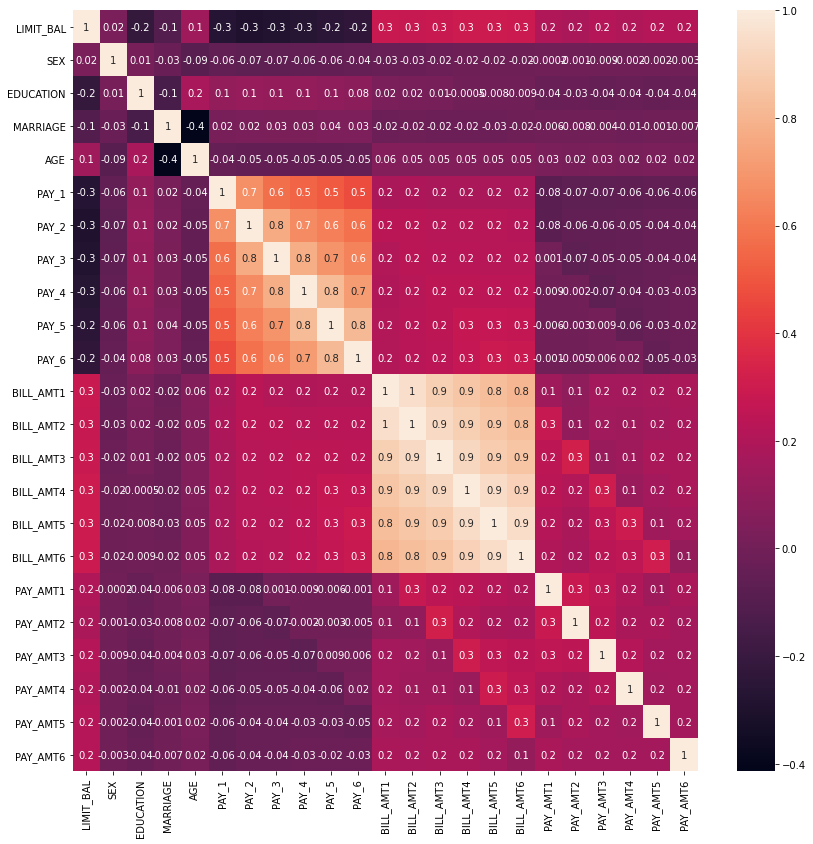

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')          

BILL_AMT가 가장 변동성이 크다!
그 다음으로 PAY가 변동성이 크다.

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+ str(i) for i in range(1,7)]
print('대상 속성 명: ',cols_bill)

cols_pay = ['PAY_' + str(i) for i in range(1,7)]
print('대상 속성 명: ',cols_pay)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
df_cols_scaled_p = scaler.fit_transform(X_features[cols_pay])

pca = PCA(n_components=2).fit(df_cols_scaled)

pca_p = PCA(n_components=2).fit(df_cols_scaled_p)

print('PCA Component(bill)별 변동성: ', pca.explained_variance_ratio_)
print('PCA Component(pay)별 변동성: ', pca_p.explained_variance_ratio_)

대상 속성 명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
대상 속성 명:  ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
PCA Component(bill)별 변동성:  [0.90555253 0.0509867 ]
PCA Component(pay)별 변동성:  [0.71645838 0.11674569]


In [13]:
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
start = time.time()
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))
print('실행시간 :', time.time() - start)

CV=3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170
실행시간 : 39.281938791275024


In [19]:
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=7)
start = time.time()
df_pca = pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)
exe_time = time.time() - start
print('CV=3인 경우의 PCA 변환된 개별 Fold세트별 정확도:', scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))
print('실행시간 :',exe_time)

CV=3인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7944 0.7996 0.8019]
PCA 변환 데이터 셋 평균 정확도:0.7986
실행시간 : 37.018993616104126


In [20]:
pca = PCA(n_components=6)
start = time.time()
df_pca = pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)
exe_time = time.time() - start
print('CV=3인 경우의 PCA 변환된 개별 Fold세트별 정확도:', scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))
print('실행시간 :',exe_time)

CV=3인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7927 0.7961 0.8016]
PCA 변환 데이터 셋 평균 정확도:0.7968
실행시간 : 36.580440044403076


In [21]:
pca = PCA(n_components=5)
start = time.time()
df_pca = pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)
exe_time = time.time() - start
print('CV=3인 경우의 PCA 변환된 개별 Fold세트별 정확도:', scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))
print('실행시간 :',exe_time)

CV=3인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.788  0.7997 0.8024]
PCA 변환 데이터 셋 평균 정확도:0.7967
실행시간 : 36.25806522369385


In [22]:
pca = PCA(n_components=4)
start = time.time()
df_pca = pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)
exe_time = time.time() - start
print('CV=3인 경우의 PCA 변환된 개별 Fold세트별 정확도:', scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))
print('실행시간 :',exe_time)

CV=3인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7831 0.7956 0.795 ]
PCA 변환 데이터 셋 평균 정확도:0.7912
실행시간 : 35.96483135223389
